In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

# exercise

A Brazilian Coin Dataset is available. Your task is to process the images to:


* Draw a rectangle bounding the coin
* Define a way to identify the currency value

NOTE:
a) You cannot use any machine learning approach (KNN, SVM, CNN,...). You should you on image processing based techniques such as pixel count, size, colors, etc.

b) You can use some drawing and image enhancement functions (filters). Check out the links below:

Drawing of geometric shapes: https://scikit-image.org/docs/dev/api/skimage.draw.html

Filters: https://scikit-image.org/skimage-tutorials/lectures/1_image_filters.html

Suggestion: Gaussian, median and average filter. Also, try some approaches with edge detectors.

In [1]:
#Dataset Download
!wget https://www.inf.ufpr.br/aghochuli/dataset.zip -O dataset.zip
!unzip dataset.zip

!wget https://www.inf.ufpr.br/aghochuli/dataset2.zip -O dataset2.zip
!unzip dataset2.zip

--2021-08-23 17:31:25--  https://www.inf.ufpr.br/aghochuli/dataset.zip
Resolving www.inf.ufpr.br (www.inf.ufpr.br)... 200.17.202.113, 2801:82:80ff:8001:216:ccff:feaa:79
Connecting to www.inf.ufpr.br (www.inf.ufpr.br)|200.17.202.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17813548 (17M) [application/zip]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>]  16.99M  9.57MB/s    in 1.8s    

2021-08-23 17:31:29 (9.57 MB/s) - ‘dataset.zip’ saved [17813548/17813548]

Archive:  dataset.zip
   creating: dataset/
  inflating: dataset/10_1477147452.jpg  
  inflating: dataset/25_1477286322.jpg  
  inflating: dataset/10_1477289670.jpg  
  inflating: dataset/100_1477281636.jpg  
  inflating: dataset/5_1477188558.jpg  
  inflating: dataset/50_1477194336.jpg  
  inflating: dataset/50_1477144614.jpg  
  inflating: dataset/100_1477281552.jpg  
  inflating: dataset/25_1477154190.jpg  
  inflating: dataset/100_1477154982.jpg  
  inflating: dataset/5_

In [3]:
#Carregando para uma lista de imagens
import os
from skimage import io

dataset_1 = []
dataset_2 = []

for img_path in os.listdir('./dataset/'):         
    dataset_1.append([io.imread('./dataset/' + img_path),img_path])

for img_path in os.listdir('./dataset2/'):         
    dataset_2.append([io.imread('./dataset2/' + img_path),img_path])

print(len(dataset_1),"images loaded")
print(len(dataset_2),"images loaded")

202 images loaded
1000 images loaded


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (144, 192, 3) looks like an RGB image
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (480, 640, 3) looks like an RGB image
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (240, 320, 3) looks like an RGB image
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (72, 96, 3) looks like an RGB image


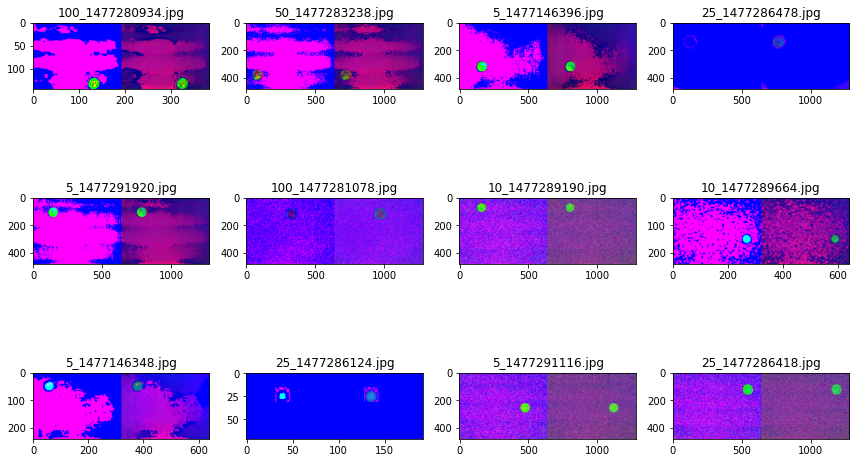

In [14]:
#Showing some images
import random
import numpy as np
from skimage.color import rgb2gray,rgb2hsv
from skimage.filters import threshold_otsu, threshold_local

random.shuffle(dataset_1)

fig, axes = plt.subplots(3, 4, figsize=(12, 8))
ax = axes.ravel()

for i in range(12):

    ax[i].set_title(dataset_1[i][1])

    im = rgb2hsv(dataset_1[i][0])

    block_size = 35
    local_thresh = threshold_otsu(im, block_size)
    binary_local = im > local_thresh

    im_concat = np.concatenate([binary_local,im],axis=1)
    ax[i].imshow(im_concat,cmap=plt.cm.gray)


fig.tight_layout()
plt.show()

Vemos que existem vários desafios:


*   Ruídos
*   Sombra
*   Brilho
*   Escala

O primeiro passo é achar um processo para normalizar as imagens!

....binarize, aplique filtros, teste sistemas de cores distintos....

Mão na massa, agora é com você!



In [44]:
import cv2
from google.colab.patches import cv2_imshow # for image display


def circling(image):

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU )[1]

    #thresh = cv2.bitwise_not(thresh)

    output = cv2.connectedComponentsWithStats(thresh, 8, cv2.CV_32S)
    (numLabels, labels, stats, centroids) = output

    output_cr = image.copy()
    for i in range(0, numLabels):
        
        x = stats[i, cv2.CC_STAT_LEFT]
        y = stats[i, cv2.CC_STAT_TOP]
        w = stats[i, cv2.CC_STAT_WIDTH]
        h = stats[i, cv2.CC_STAT_HEIGHT]
        area = stats[i, cv2.CC_STAT_AREA]
        (cX, cY) = centroids[i]

        cv2.circle(output_cr, (int(cX), int(cY)), 10, (255, 0, 0), 10)

    plt.imshow(output_cr);plt.show();print("\n\n")


In [1]:


block_size = 35
for i in range(len(dataset_2)):

    try:
    
        local_thresh = threshold_otsu(dataset_2[i][0], block_size)

        binary_local = dataset_2[i][0] > local_thresh
  
        im_concat = np.concatenate([binary_local, dataset_2[i][0]], axis=1)

        circling(im_concat)

    except:

        print(f"Image {i} raised an error.")



NameError: ignored